1.	Exploratory Data Analysis and Data Understanding [5]:

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression

In [15]:
file_path='/content/drive/MyDrive/Ai final assignment/ENB2012_data.csv'

In [16]:
data = pd.read_csv(file_path)
data.head(10)

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
5,0.90,563.5,318.5,122.50,7.0,3,0.0,0,21.46,25.38
6,0.90,563.5,318.5,122.50,7.0,4,0.0,0,20.71,25.16
7,0.90,563.5,318.5,122.50,7.0,5,0.0,0,19.68,29.60
8,0.86,588.0,294.0,147.00,7.0,2,0.0,0,19.50,27.30
9,0.86,588.0,294.0,147.00,7.0,3,0.0,0,19.95,21.97


In [17]:
data_rows= data.shape[0]
data_columns= data.shape[1]
print(f"Number of rows: {data_rows}")
print(f"Number of columns: {data_columns}")

Number of rows: 768
Number of columns: 10


In [18]:
# Identify columns with missing values
cols_with_missing = [col for col in data.columns if data[col].isnull().any()]

# 2. Imputation with the median (for numerical data, more robust to outliers):
for col in cols_with_missing:
    if pd.api.types.is_numeric_dtype(data[col]):
        data[col] = data[col].fillna(data[col].median())


In [19]:
missing_values = data.isnull().sum()
print("The missing value in data are :\n", missing_values)

The missing value in data are :
 X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64


In [20]:
duplicated_values = data.duplicated().sum()
print("The duplicated value in data are :\n",duplicated_values )

The duplicated value in data are :
 0


Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y1', 'Y2'], dtype='object')

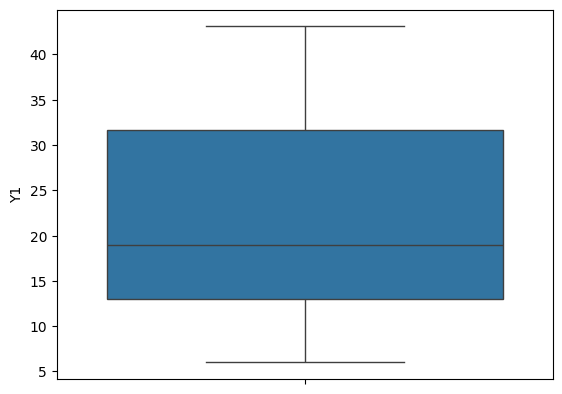

In [21]:
sns.boxplot(data["Y1"])  # Replace "Y1" with a valid column name from your dataset.
data.columns


In [22]:
description = data.describe()
description

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [24]:
counted_values = data["X1"].value_counts()
counted_values

,count
X1,
0.98,64
0.90,64
0.86,64
0.82,64
0.79,64
0.76,64
0.74,64
0.71,64
0.69,64


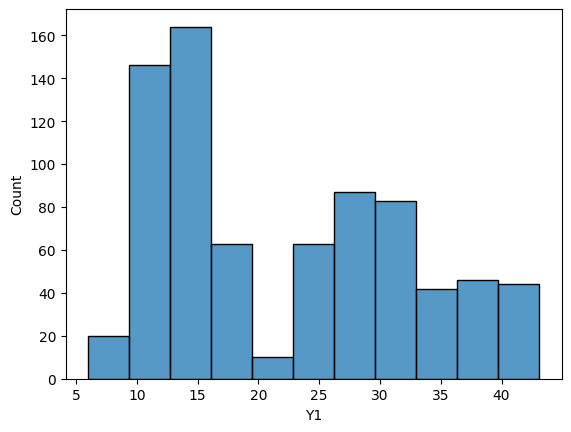

In [26]:
import matplotlib.pyplot as plt
sns.histplot(data['Y1']) #You should replace 'median_house_value' with a column name from your dataset.  In your provided code, 'Y1' appears to be a reasonable option given the boxplot you've already created using it.
plt.show()


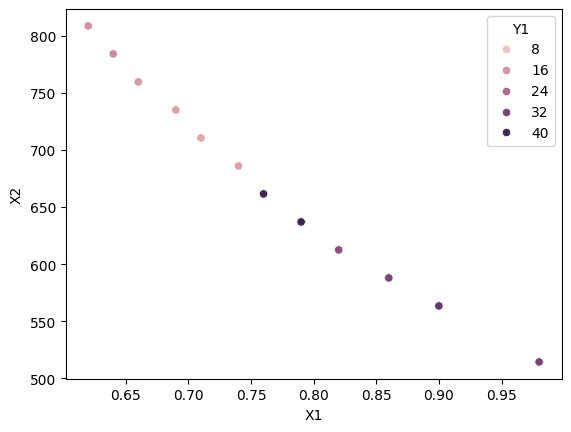

In [27]:
# prompt: sns.scatterplot(x='longitude', y='latitude', data=data, hue='median_house_value')
# plt.show()
# what should be here according to my dataset

import matplotlib.pyplot as plt
sns.scatterplot(x='X1', y='X2', data=data, hue='Y1') #Example using X1, X2, and Y1.  Replace with your desired columns.
plt.show()


In [28]:
numerical_data = data.select_dtypes(include=np.number)


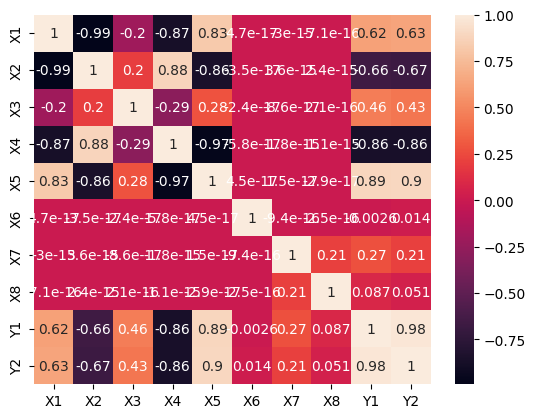

In [29]:
sns.heatmap(numerical_data.corr(), annot=True)
plt.show()

In [33]:
print(data.head())

     X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28


In [34]:
scaler = MinMaxScaler()
numerical_cols = data.select_dtypes(include=np.number).columns
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

print(data.head())


         X1        X2        X3        X4   X5        X6   X7   X8        Y1  \
0  1.000000  0.000000  0.285714  0.000000  1.0  0.000000  0.0  0.0  0.257212   
1  1.000000  0.000000  0.285714  0.000000  1.0  0.333333  0.0  0.0  0.257212   
2  1.000000  0.000000  0.285714  0.000000  1.0  0.666667  0.0  0.0  0.257212   
3  1.000000  0.000000  0.285714  0.000000  1.0  1.000000  0.0  0.0  0.257212   
4  0.777778  0.166667  0.428571  0.111111  1.0  0.000000  0.0  0.0  0.399838   

         Y2  
0  0.280905  
1  0.280905  
2  0.280905  
3  0.280905  
4  0.468085  


2.	Build a Model from Scratch [5]:

In [36]:
split_ratio = 0.8
split_index = int(len(data) * split_ratio)

# Shuffle the dataset randomly (optional but recommended)
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

# Split into features (X) and target (y)
# Assuming 'Y1' is the target variable (heating load)
X = data.drop('Y1', axis=1)
y = data['Y1']

# Split into training and testing sets
X_train = X[:split_index]
y_train = y[:split_index]
X_test = X[split_index:]
y_test = y[split_index:]

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (614, 9)
y_train shape: (614,)
X_test shape: (154, 9)
y_test shape: (154,)


In [37]:
def rmse(Y, Y_pred):
    return np.sqrt(np.mean((Y_pred - Y)**2))

def r2(Y, Y_pred):
    ss_res = np.sum((Y - Y_pred)**2)
    ss_tot = np.sum((Y - np.mean(Y))**2)
    return 1 - (ss_res / ss_tot)


In [38]:
def linear_regression_fit(X, y, learning_rate=0.01, n_iterations=1000):
    """Fits a linear regression model using gradient descent."""
    # Convert X to a NumPy array with dtype float64
    X = X.astype(np.float64) # Convert X to numerical before calculations

    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    bias = 0

    for _ in range(n_iterations):
        y_predicted = np.dot(X, weights) + bias
        dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
        db = (1 / n_samples) * np.sum(y_predicted - y)

        weights -= learning_rate * dw
        bias -= learning_rate * db

    return weights, bias

In [39]:
def linear_regression_predict(X, weights, bias):
    """Predicts values using the trained linear regression model."""
    return np.dot(X, weights) + bias

In [40]:
# Assuming X_train and y_train are defined from the previous code
X_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
W_final, b_final = linear_regression_fit(X_b, y_train)

Y_pred = X_b.dot(W_final) + b_final # Added b_final here
print("RMSE:", rmse(y_train, Y_pred)) # Use y_train for training data
print("R² Score:", r2(y_train, Y_pred)) # Use y_train for training data


RMSE: 0.07522120254528607
R² Score: 0.9235060845141012


In [41]:
def cost_function(X, Y, W):
    m = len(Y)
    predictions = X.dot(W)
    cost = (1/(2*m)) * np.sum(np.square(predictions - Y))
    return cost


In [42]:
def gradient_descent(X, Y, W, alpha, iterations):
    m = len(Y)
    cost_history = []
    for _ in range(iterations):
        Y_pred = X.dot(W)
        loss = Y_pred - Y
        gradients = (1/m) * X.T.dot(loss)
        W -= alpha * gradients
        cost = cost_function(X, Y, W)
        cost_history.append(cost)
    return W, cost_history

In [43]:

X_b = np.c_[np.ones((X.shape[0], 1)), X]
X_b = X_b.astype(np.float64)
W = np.zeros(X_b.shape[1])


In [44]:
def rmse(Y, Y_pred):
    return np.sqrt(np.mean((Y_pred - Y)**2))

def r2(Y, Y_pred):
    ss_res = np.sum((Y - Y_pred)**2)
    ss_tot = np.sum((Y - np.mean(Y))**2)
    return 1 - (ss_res / ss_tot)

Y_pred = X_b.dot(W_final)
print("RMSE:", rmse(y, Y_pred))
print("R² Score:", r2(y, Y_pred))

RMSE: 0.09989099052489075
R² Score: 0.8650002450132938


In [45]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the training set
y_pred_train = model.predict(X_train)

# Evaluate the model on the training set
print("Training RMSE:", rmse(y_train, y_pred_train))
print("Training R² Score:", r2(y_train, y_pred_train))

# Make predictions on the testing set
y_pred_test = model.predict(X_test)

# Evaluate the model on the testing set
print("Testing RMSE:", rmse(y_test, y_pred_test))
print("Testing R² Score:", r2(y_test, y_pred_test))


Training RMSE: 0.0481870722247458
Training R² Score: 0.9686088354494427
Testing RMSE: 0.046580595468416135
Testing R² Score: 0.9705280117860177


In [46]:
# Create and train the SGDRegressor model
sgd_model = SGDRegressor(loss='squared_error', max_iter=1000, learning_rate='constant', eta0=0.01)
sgd_model.fit(X_train, y_train)

# Make predictions on the training set
y_pred_train_sgd = sgd_model.predict(X_train)

# Evaluate the model on the training set
print("SGD Training RMSE:", rmse(y_train, y_pred_train_sgd))
print("SGD Training R² Score:", r2(y_train, y_pred_train_sgd))

# Make predictions on the testing set
y_pred_test_sgd = sgd_model.predict(X_test)

# Evaluate the model on the testing set
print("SGD Testing RMSE:", rmse(y_test, y_pred_test_sgd))
print("SGD Testing R² Score:", r2(y_test, y_pred_test_sgd))


SGD Training RMSE: 0.06250235848298243
SGD Training R² Score: 0.9471872042479232
SGD Testing RMSE: 0.0665269450855913
SGD Testing R² Score: 0.9398833841389362


In [47]:

# Hyperparameter tuning for Linear Regression (using RandomizedSearchCV)
param_grid_lr = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}

random_search_lr = RandomizedSearchCV(
    estimator=LinearRegression(),
    param_distributions=param_grid_lr,  # Use param_distributions for RandomizedSearchCV
    n_iter=4,  # Number of random combinations to try (all combinations in this case)
    cv=5,
    scoring='neg_mean_squared_error',
    random_state=42  # For reproducibility
)

random_search_lr.fit(X_train, y_train)

print("Linear Regression Best Hyperparameters:", random_search_lr.best_params_)
print("Linear Regression Best Score:", random_search_lr.best_score_)

# Hyperparameter tuning for SGDRegressor (using RandomizedSearchCV)
param_grid_sgd = {
    'loss': ['squared_error', 'huber', 'epsilon_insensitive'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'optimal', 'invscaling'],
    'eta0': [0.01, 0.1, 1]
}

random_search_sgd = RandomizedSearchCV(
    estimator=SGDRegressor(max_iter=5000),
    param_distributions=param_grid_sgd,
    n_iter=10,
    cv=5,
    scoring='neg_mean_squared_error',
    random_state=42
)

random_search_sgd.fit(X_train, y_train)

print("\nSGDRegressor Best Hyperparameters:", random_search_sgd.best_params_)
print("SGDRegressor Best Score:", random_search_sgd.best_score_)

Linear Regression Best Hyperparameters: {'positive': True, 'fit_intercept': False}
Linear Regression Best Score: -0.0024028323899079715

SGDRegressor Best Hyperparameters: {'penalty': 'elasticnet', 'loss': 'huber', 'learning_rate': 'constant', 'eta0': 0.1, 'alpha': 0.001}
SGDRegressor Best Score: -0.0027225427896781533


In [48]:

# Assuming X_train and y_train are defined from the previous code

# Apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=f_regression, k=10)
fit = bestfeatures.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)
#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

# Get the indices of the selected features
selected_feature_indices = fit.get_support(indices=True)

# Get the names of the selected features
selected_features = X_train.columns[selected_feature_indices].tolist()

# Create new training and testing sets with only the selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

print("\nSelected Features:", selected_features)
print("\nX_train_selected shape:", X_train_selected.shape)
print("X_test_selected shape:", X_test_selected.shape)


  Specs         Score
8    Y2  12324.159454
4    X5   2423.695863
3    X4   1881.887183
1    X2    472.641355
0    X1    391.806030
2    X3    170.561785
6    X7     35.175271
7    X8      3.047224
5    X6      0.196141

Selected Features: ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y2']

X_train_selected shape: (614, 9)
X_test_selected shape: (154, 9)


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=10 is greater than n_features=9. All the features will be returned.
  warnings.warn(


In [49]:
# Assuming X_train, y_train, X_test, y_test, random_search_lr, and random_search_sgd are defined from previous cells

# Get optimal parameters from RandomizedSearchCV
optimal_params_lr = random_search_lr.best_params_  # Corrected to use random_search_lr
optimal_params_sgd = random_search_sgd.best_params_

# Assuming selected_features is defined from the feature selection task
# (If not, you'll need to define it or modify this section accordingly)

# Instead of hardcoding, get the selected features from Task 5
selected_features = X_train_selected.columns.tolist() # Get selected features from Task 5


# Create new training and testing sets with selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Rebuilding Linear Regression model with optimal parameters
final_lr_model = LinearRegression(**optimal_params_lr)
final_lr_model.fit(X_train_selected, y_train)

# Predictions
y_pred_train_lr = final_lr_model.predict(X_train_selected)
y_pred_test_lr = final_lr_model.predict(X_test_selected)

# Evaluation metrics
print("\nFinal Linear Regression Model:")
print("Training RMSE:", rmse(y_train, y_pred_train_lr))
print("Training R² Score:", r2(y_train, y_pred_train_lr))
print("Testing RMSE:", rmse(y_test, y_pred_test_lr))
print("Testing R² Score:", r2(y_test, y_pred_test_lr))


# Rebuilding SGDRegressor model with optimal parameters
final_sgd_model = SGDRegressor(max_iter=5000, **optimal_params_sgd) # Ensure max_iter is set
final_sgd_model.fit(X_train_selected, y_train)


# Predictions
y_pred_train_sgd = final_sgd_model.predict(X_train_selected)
y_pred_test_sgd = final_sgd_model.predict(X_test_selected)

# Evaluation metrics
print("\nFinal SGDRegressor Model:")
print("Training RMSE:", rmse(y_train, y_pred_train_sgd))
print("Training R² Score:", r2(y_train, y_pred_train_sgd))
print("Testing RMSE:", rmse(y_test, y_pred_test_sgd))
print("Testing R² Score:", r2(y_test, y_pred_test_sgd))


Final Linear Regression Model:
Training RMSE: 0.04854510896444615
Training R² Score: 0.9681406208817549
Testing RMSE: 0.046975295193330636
Testing R² Score: 0.9700264351203798

Final SGDRegressor Model:
Training RMSE: 0.050132611842958176
Training R² Score: 0.9660228450939574
Testing RMSE: 0.05098711475989264
Testing R² Score: 0.9646881690587031
